In [ ]:
import pandas as pd
import numpy as np

fordData = pd.read_excel('Ford data with MACD.xlsx')
appleData = pd.read_excel('Apple stock data.xlsx')

start_value = 100000 # start price of the portfolio
allocs = [.4,.6] # allocations to the stocks 40 percent to ford and 60 percent to apple

fordData = pd.DataFrame(fordData)
appleData = pd.DataFrame(appleData)


In [ ]:
#Ford data preprocessing
fordData.drop('Unnamed: 0',axis=1,inplace=True)
fordData.head(20)
fordData = fordData[11096:]

In [ ]:
#merging the two dataframes on date columns and creating a new dataframe for close columns of both dataframes
newdf = pd.merge(fordData[['Date','Close']],appleData[['Date','Close']],on='Date')

In [ ]:
#creating a new dataframe for normalizing the prices of both stocks
normalized = pd.DataFrame(columns=['Date','Ford Close','Apple Close'])
normalized['Ford Close'] = newdf['Close_x'][1:] / newdf['Close_x'][0]
normalized['Apple Close'] = newdf['Close_y'][1:] / newdf['Close_y'][0]
normalized['Date'] = newdf['Date']

In [62]:
date = normalized['Date']

alloced = normalized[['Ford Close','Apple Close']].multiply(allocs)
alloced = pd.concat([date,alloced],axis=1)
alloced

,Date,Ford Close,Apple Close
1,2021-01-07,0.409955,0.620474
2,2021-01-08,0.407240,0.625829
3,2021-01-11,0.420814,0.611280
4,2021-01-12,0.442534,0.610427
5,2021-01-13,0.442534,0.620332
...,...,...,...
245,2021-12-27,0.941176,0.854645
246,2021-12-28,0.939367,0.849716
247,2021-12-29,0.930317,0.850142
248,2021-12-30,0.926244,0.844550


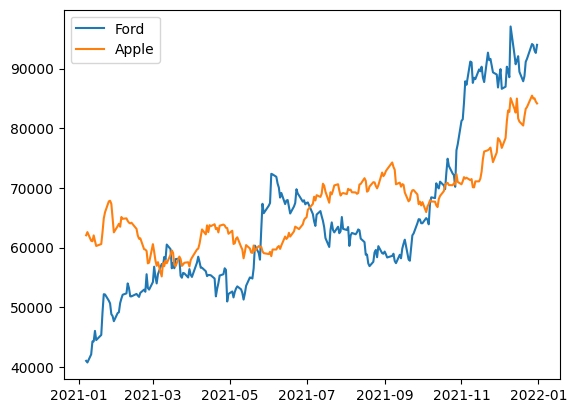

In [94]:

date = alloced['Date']
pos_val = alloced[['Ford Close','Apple Close']].multiply(start_value)
pos_val = pd.concat([date,pos_val],axis=1)

# pos_val.set_index('Date',inplace=True)
pos_val
import matplotlib.pyplot as plt

plt.plot(pos_val['Date'],pos_val['Ford Close'],label = 'Ford')
plt.plot(pos_val['Date'],pos_val['Apple Close'],label = 'Apple')
plt.legend()
pos_val.set_index('Date',inplace=True)

In [99]:

portfolio_val = pd.DataFrame(columns=['Values'])
portfolio_val['Values'] = pos_val.sum(axis =1)

plt.plot(portfolio_val['Values'])

,Values
Date,
2021-01-07,103042.868358
2021-01-08,103306.922490
2021-01-11,103209.408761
2021-01-12,105296.049876
2021-01-13,106286.569479
...,...
2021-12-27,179582.103933
2021-12-28,178908.213407
2021-12-29,178045.895556
